<a href="https://colab.research.google.com/github/bijili-parasa/DL_PROJECTS/blob/main/car_detection_rcnn_s1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od

In [ ]:
dataset = 'https://www.kaggle.com/datasets/sshikamaru/car-object-detection'

In [ ]:
od.download(dataset)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: anuradhabhanu
Your Kaggle Key: ··········


100%|██████████| 112M/112M [00:04<00:00, 27.2MB/s]


In [ ]:
import os

In [ ]:
data_dir = './car-object-detection'

In [ ]:
os.listdir(data_dir)

['data']

In [ ]:
!pip uninstall --yes opencv-contrib-python opencv-python
!pip install opencv-contrib-python

Found existing installation: opencv-contrib-python 4.8.0.76
Uninstalling opencv-contrib-python-4.8.0.76:
  Successfully uninstalled opencv-contrib-python-4.8.0.76
Found existing installation: opencv-python 4.8.0.76
Uninstalling opencv-python-4.8.0.76:
  Successfully uninstalled opencv-python-4.8.0.76
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 MB 9.3 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import os
import random

In [ ]:
len_train = len(os.listdir('/content/car-object-detection/data/training_images'))
len_test = len(os.listdir('/content/car-object-detection/data/testing_images'))
print('Number of Training Images:', len_train)
print('Number of Test Images:', len_test)

Number of Training Images: 1001
Number of Test Images: 175


In [ ]:
Data=pd.read_csv('/content/car-object-detection/data/train_solution_bounding_boxes (1).csv')
Data.head()


,image,xmin,ymin,xmax,ymax
0,vid_4_1000.jpg,281.259045,187.035071,327.727931,223.225547
1,vid_4_10000.jpg,15.163531,187.035071,120.329957,236.430180
2,vid_4_10040.jpg,239.192475,176.764801,361.968162,236.430180
3,vid_4_10020.jpg,496.483358,172.363256,630.020260,231.539575
4,vid_4_10060.jpg,16.630970,186.546010,132.558611,238.386422


In [ ]:
len_data = len(Data)
print('Number of Train data localization:', len_data)

Number of Train data localization: 559


Shape of Photo: (380, 676, 3)
Name of photo,xmin,ymin,xmax,ymax: ['vid_4_1000.jpg' 281.2590449 187.0350708 327.7279305 223.225547]


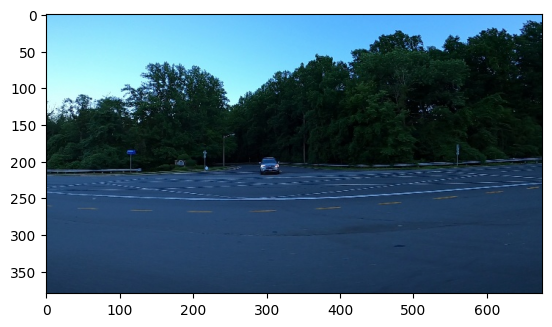

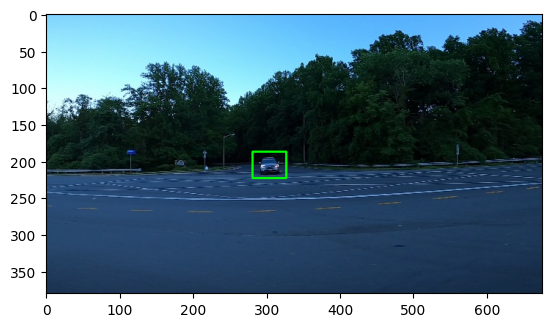

In [ ]:
for i in Data.values:
  photo=plt.imread(f'/content/car-object-detection/data/training_images/{i[0]}')
  plt.imshow(photo)
  print('Shape of Photo:',photo.shape)
  print('Name of photo,xmin,ymin,xmax,ymax:',i)
  points1=(int(i[1]),int(i[2]))
  points2=(int(i[3]),int(i[4]))
  cv2.rectangle(photo,points1,points2, (0, 255, 0), 2)
  plt.figure()
  plt.imshow(photo)
  break

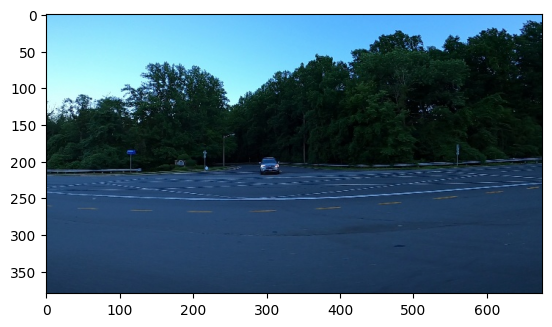

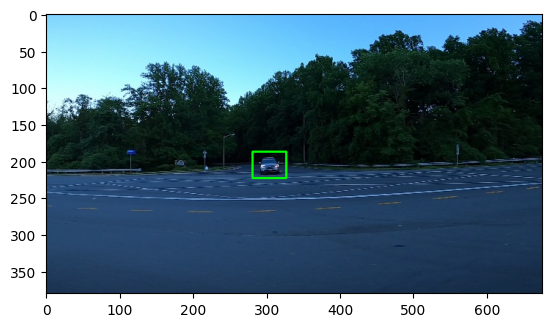

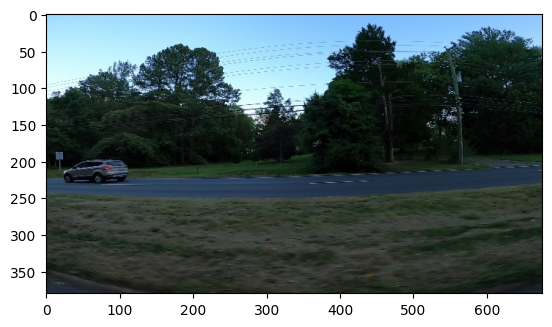

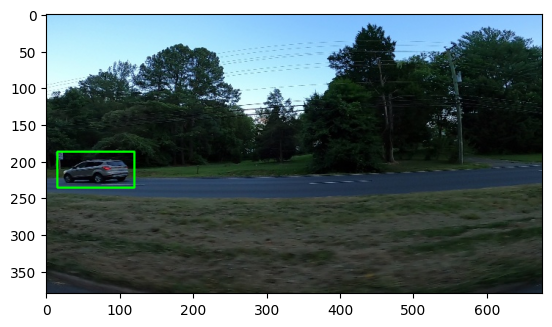

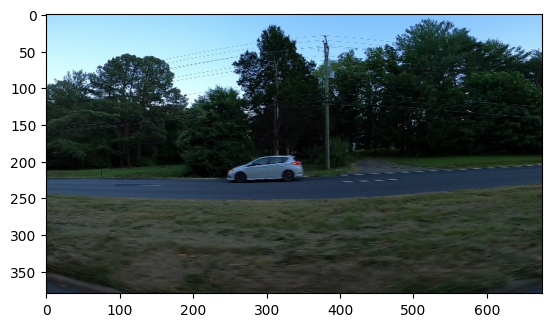

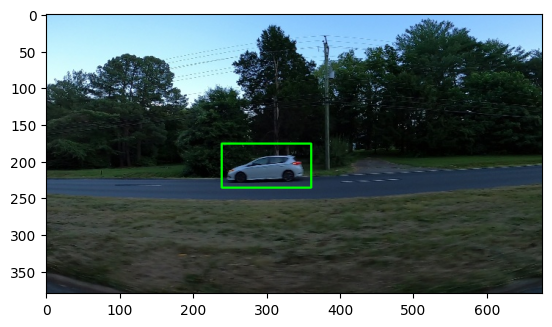

In [ ]:
for b,i in enumerate(Data.values):
  img=plt.imread('/content/car-object-detection/data/training_images/'+i[0])
  plt.figure()
  plt.imshow(img)
  xmin=int(i[1])
  ymin=int(i[2])
  xmax=int(i[3])
  ymax=int(i[4])
  cv2.rectangle(img,(xmin, ymin),(xmax, ymax),(0, 255, 0),2)
  plt.figure()
  plt.imshow(img)
  if b ==2:
    break

In [ ]:
cv2.setUseOptimized(True)
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()

possible bounding boxes: 213


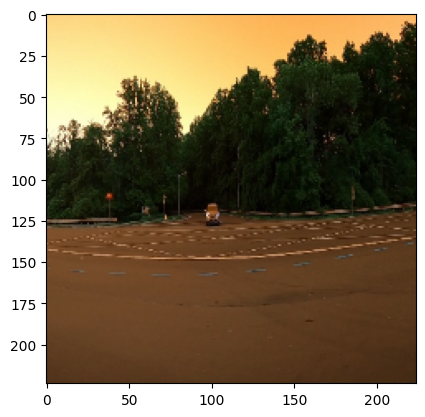

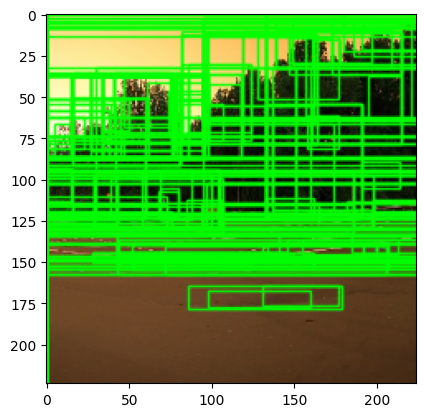

In [ ]:
im = cv2.imread('/content/car-object-detection/data/training_images/vid_4_1000.jpg')
im=cv2.resize(im,(224,224))
plt.figure()
plt.imshow(im)
ss.setBaseImage(im)
ss.switchToSelectiveSearchFast()
print('possible bounding boxes:',len(ss.process()))

for rect in ss.process():
  x, y, w, h = rect
  imOut=cv2.rectangle(im, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
plt.figure()
plt.imshow(imOut);

In [ ]:
cv2.setUseOptimized(True)
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
def selective_search(bb1, bb2):

    assert bb1['x1'] < bb1['x2'] #bb1
    assert bb1['y1'] < bb1['y2']

    assert bb2['x1'] < bb2['x2'] #bb2
    assert bb2['y1'] < bb2['y2'];

    x_left = max(bb1['x1'], bb2['x1'])
    y_top = max(bb1['y1'], bb2['y1'])
    x_right = min(bb1['x2'], bb2['x2'])
    y_bottom = min(bb1['y2'], bb2['y2'])

    if x_right < x_left or y_bottom < y_top:
      return 0.0
    intersection_area = (x_right - x_left) * (y_bottom - y_top)
    bb1_area = (bb1['x2'] - bb1['x1']) * (bb1['y2'] - bb1['y1'])
    bb2_area = (bb2['x2'] - bb2['x1']) * (bb2['y2'] - bb2['y1'])
    iou = intersection_area / float(bb1_area + bb2_area - intersection_area)
    assert iou >= 0.0
    assert iou <= 1.0
    return iou

In [ ]:
image_list=[]
k=0
l=0
z=0
for a in pd.read_csv('/content/car-object-detection/data/train_solution_bounding_boxes (1).csv').values:
  Name,xmin,ymin,xmax,ymax=a
  bb1={
            'x1':int(xmin),
            'y1':int(ymin),
            'x2':int(xmax),
            'y2':int(ymax)
            }
  try:
    img=cv2.imread('/content/car-object-detection/data/training_images/'+Name)
    ss.setBaseImage(img)
    ss.switchToSelectiveSearchFast()
    for i in ss.process():
      x, y, w, h = i
      bb2={'x1':x,
          'y1':y,
          'x2':x+w,
          'y2':y+h
          }
      if k<l:
            if 0.5<selective_search(bb1,bb2):
              image_list.append([cv2.resize(img[bb2['y1']:bb2['y2'],bb2['x1']:bb2['x2']],(224,224)),1])
              k+=1
      else:
        if 0.5<selective_search(bb1,bb2):
          image_list.append([cv2.resize(img[bb2['y1']:bb2['y2'],bb2['x1']:bb2['x2']],(224,224)),1])
          k+=1
        else:
          image_list.append([cv2.resize(img[bb2['y1']:bb2['y2'],bb2['x1']:bb2['x2']],(224,224)),0])
          l+=1
  except Exception as err:
    print('Error',err)
  z+=1
  print('count: ', z,'length: ', len(ss.process()))

count:  1 length:  1101
count:  2 length:  1456
count:  3 length:  1403
count:  4 length:  1489
count:  5 length:  1315
count:  6 length:  1537
count:  7 length:  1430
count:  8 length:  1544
count:  9 length:  1117
count:  10 length:  1146
count:  11 length:  1663
count:  12 length:  1815
count:  13 length:  1725
count:  14 length:  1251
count:  15 length:  1894
count:  16 length:  1676
count:  17 length:  1754
count:  18 length:  1553
count:  19 length:  1779
count:  20 length:  1863
count:  21 length:  1846
count:  22 length:  1884
count:  23 length:  1929
count:  24 length:  1925
count:  25 length:  1880
count:  26 length:  1801
count:  27 length:  1824
count:  28 length:  1857
count:  29 length:  1947
count:  30 length:  1932
count:  31 length:  1970
count:  32 length:  1901
count:  33 length:  1979
count:  34 length:  1971
count:  35 length:  1879
count:  36 length:  1870
count:  37 length:  1821
count:  38 length:  1632
count:  39 length:  1632
count:  40 length:  1682
count:  4

In [ ]:
print(len(image_list))

10581


In [ ]:
data=[]
data_label=[]
for features,label in image_list:
  data.append(features)
  data_label.append(label)
print('success')

success


In [ ]:
print('Number of Photos:',len(data),'|Number of Labels:',len(data_label))

Number of Photos: 10581 |Number of Labels: 10581


Class: 1
Shape: (224, 224, 3)


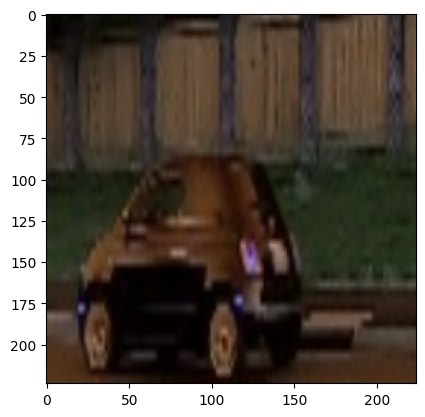

In [ ]:
i=random.randint(1,10583)
print('Class:',data_label[i])
print('Shape:',data[i].shape)
plt.imshow(data[i]);

In [ ]:
data=np.asarray(data)
data_label=np.asarray(data_label)

In [ ]:
len_no_car_image = len(data_label[data_label==0])
len_car_image = len(data_label[data_label==1])
print('No car Image:', len_no_car_image,'|Car Image:', len_car_image)

No car Image: 5291 |Car Image: 5290


In [ ]:
data.shape
data_label.shape

(10581,)

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_val,y_train,y_val=train_test_split(data,data_label,test_size=0.40, random_state=42)

print('x_train shape:',x_train.shape)
print('x_val shape:',x_val.shape)
print('y_train shape:',y_train.shape)
print('y_val shape:',y_val.shape)

x_train shape: (6348, 224, 224, 3)
x_val shape: (4233, 224, 224, 3)
y_train shape: (6348,)
y_val shape: (4233,)


In [ ]:
og_model=tf.keras.applications.VGG16(include_top=False,input_shape=(224,224,3),weights='imagenet')
og_model.summary()

58889256/58889256 [==============================] - 2s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [ ]:
model=tf.keras.Sequential()
model.add(og_model)
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 1)                 513       
                                                                 
Total params: 14,715,201
Trainable params: 14,715,201
Non-trainable params: 0
_________________________________________________________________


In [ ]:
og_model.trainable=False

In [ ]:
for i,layer in enumerate(og_model.layers):
  print(i,layer.name,'-',layer.trainable)

0 input_1 - False
1 block1_conv1 - False
2 block1_conv2 - False
3 block1_pool - False
4 block2_conv1 - False
5 block2_conv2 - False
6 block2_pool - False
7 block3_conv1 - False
8 block3_conv2 - False
9 block3_conv3 - False
10 block3_pool - False
11 block4_conv1 - False
12 block4_conv2 - False
13 block4_conv3 - False
14 block4_pool - False
15 block5_conv1 - False
16 block5_conv2 - False
17 block5_conv3 - False
18 block5_pool - False


In [ ]:
model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(),metrics='accuracy')

In [ ]:
epoch=2
hist=model.fit(x_train,y_train,epochs=epoch,validation_data=(x_val,y_val))

Epoch 1/2
199/199 [==============================] - 6333s 32s/step - loss: 0.6017 - accuracy: 0.8324 - val_loss: 0.1747 - val_accuracy: 0.9596
Epoch 2/2
110/199 [===============>..............] - ETA: 28:09 - loss: 0.2881 - accuracy: 0.9210

In [ ]:
car=[]
photo_url='/content/car-object-detection/data/testing_images/vid_5_27620.jpg' # change the path for different inputs
test_img=cv2.imread(photo_url)
ss.setBaseImage(test_img)
ss.switchToSelectiveSearchFast()
print('Number of possible objects in the Photo: ',len(ss.process()))
for i in ss.process():
  x, y, w, h = i
  bb3={'x1':x,
        'y1':y,
        'x2':x+w,
        'y2':y+h
      }
  try:
    assert bb3['x1'] < bb3['x2']
    assert bb3['y1'] < bb3['y2']
    img_data=test_img[bb3['y1']:bb3['y2'],bb3['x1']:bb3['x2']]
    img_data=cv2.resize(img_data,(224,224))
    if model.predict(img_data.reshape(1,224,224,3))[0]>0.5:
      car.append([bb3,model.predict(img_data.reshape(1,224,224,3))[0]])
    else:
      pass
  except Exception as err:
    print('Error',err)
print('Number of bounding boxes where class = 1:',len(car))
test_img=cv2.imread(photo_url)
car[np.argmax(np.array(car)[:,1])][0]
pt1=(car[np.argmax(np.array(car)[:,1])][0]['x1'],car[np.argmax(np.array(car)[:,1])][0]['y1'])
pt2=(car[np.argmax(np.array(car)[:,1])][0]['x2'],car[np.argmax(np.array(car)[:,1])][0]['y2'])
plt.figure()
plt.imshow(test_img)
cv2.rectangle(test_img,pt1,pt2,(255, 0, 0),2)
plt.figure()
plt.title(f'Highest Scoring Bounding Box with Class = 1: %{car[np.argmax(np.array(car)[:,1])][1][0]*100}')
plt.imshow(test_img);

error: ignored

In [ ]:
import cv2

In [ ]:
cv2.setUseOptimized(True)
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()